In [2]:
import pandas as pd

df_train = pd.read_csv('fashion-mnist_train.csv') # 훈련 데이터 파일 열기
df_test = pd.read_csv('fashion-mnist_test.csv') # 테스트 데이터 파일 열기
print(df_train.info(), '\n')
print(df_test.info(), '\n')
print(df_train.shape, '\n')
print(df_test.shape, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None 

(60000, 785) 

(10000, 785) 



In [3]:
import numpy as np
# 데이터 프레임을 배열 형태로 저장하기
data_train = np.array(df_train, dtype=np.float32) # 훈련 데이터를 배열로 저장
X_train = data_train[:, 1:] # 훈련 데이터의 각 행별 픽셀 값 저장
Y_train = data_train[:, 0] # 훈련 데이터의 각 행별 레이블 저장

data_test = np.array(df_test) # 테스트 데이터를 배열로 저장
x_test = data_test[:, 1:] # 테스트 데이터의 각 행별 픽셀 값 저장
y_test = data_test[:, 0] # 테스트 데이터의 각 행별 레이블 저장

In [5]:
print(df_test)
print(data_test)

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0       0       0       0       0       0       0       0       9   
1         1       0       0       0       0       0       0       0       0   
2         2       0       0       0       0       0       0      14      53   
3         2       0       0       0       0       0       0       0       0   
4         3       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995      0       0       0       0       0       0       0       0       0   
9996      6       0       0       0       0       0       0       0       0   
9997      8       0       0       0       0       0       0       0       0   
9998      8       0       1       3       0       0       0       0       0   
9999      1       0       0       0       0       0       0       0     140   

      pixel9  ...  pixel775  pixel776  pixel777  pi

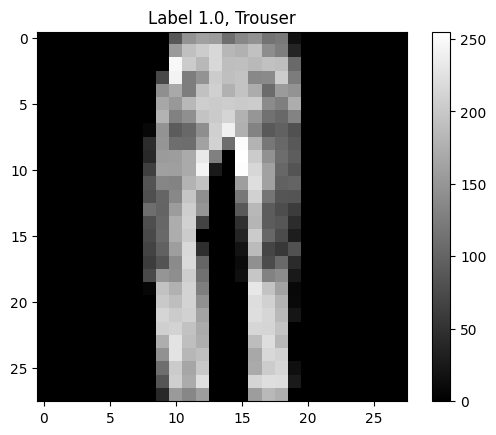

In [13]:
import matplotlib.pyplot as plt
# 의류 종류 레이블을 딕셔너리로 저장하기
label_dictionary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', \
                    3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', \
                    7: 'Sneaker', 8:'Bag', 9:'Ankle boot'}

# 훈련 데이터 중 1개 행 데이터 시각화
i = 109 # 임의의 숫자 지정
plt.imshow(X_train[i].reshape(28,28), cmap='gray')
plt.colorbar()
plt.title('Label {}, {}'.format(Y_train[i], label_dictionary[Y_train[i]]))
plt.show()

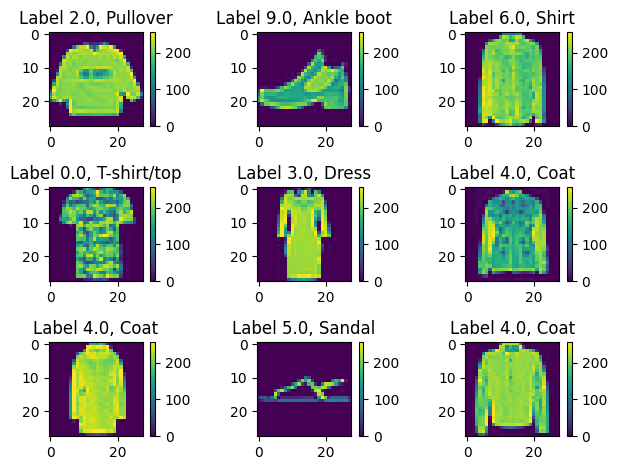

In [15]:
for i in range(9):
	plt.subplot(3, 3, i+1)
	plt.imshow(X_train[i].reshape(28, 28))
	plt.colorbar()
	plt.title('Label {}, {}'.format(Y_train[i], label_dictionary[Y_train[i]]))

plt.tight_layout()
plt.show()

In [16]:
# AND 연산 함수
def AND(x1, x2):
	# 파라미터 값(ω1, ω2, 임계값)
	w1, w2, threshold = 0.2, 0.2, 0.3
	temp = w1 * x1 + w2 * x2

	if temp <= threshold:
		return 0
	elif temp > threshold:
		return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [18]:
# OR 연산 함수
def OR(x1, x2):
	# 파라미터 값(ω1, ω2, 임계값)
	w1, w2, threshold = 0.3, 0.3, 0.2
	temp = w1 * x1 + w2 * x2
	
	if temp <= threshold:
		return 0
	elif temp > threshold:
		return 1

print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


In [19]:
# NAND 연산 함수
def NAND(x1, x2):
	# 진리표에 알맞은 값으로 조정(AND의 역이므로 AND 파라미터에 -1을 곱함.)
	w1 , w2, threshold = -0.2, -0.2, -0.3
	temp = w1 * x1 + w2 * x2

	if temp <= threshold:
		return 0
	elif temp > threshold:
		return 1

print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

# 실행 결과
# 1 1 1 0

1
1
1
0


In [20]:
def XOR(x1, x2):
	h1 = NAND(x1, x2)
	h2 = OR(x1, x2)
	y = AND(h1, h2)

	return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


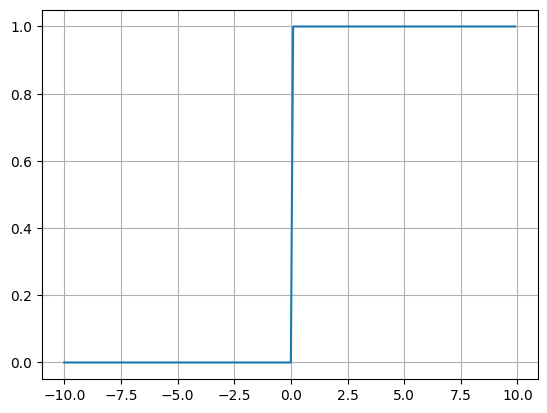

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def Step(x):
	return np.array(x > 0, dtype = np.int64) # 조건에 따라 참/거짓, 1/0의 값을 반환

x = np.arange(-10.0, 10.0, 0.1) # np.arange의 인자는 시작, 종료, 간격을 입력
y = Step(x)
plt.plot(x, y)
plt.grid()
plt.show()

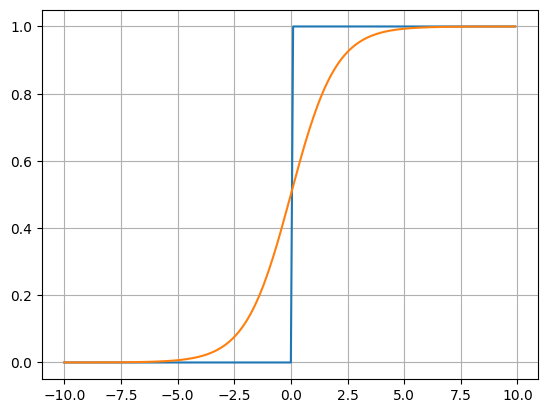

In [25]:
def Sigmoid(X):
	return 1 / (1+np.exp(-X)) # 로지스틱함수를 표현한 코드

y = np.arange(-10.0, 10.0, 0.1)
y1 = Step(x)
y2 = Sigmoid(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()
plt.show()

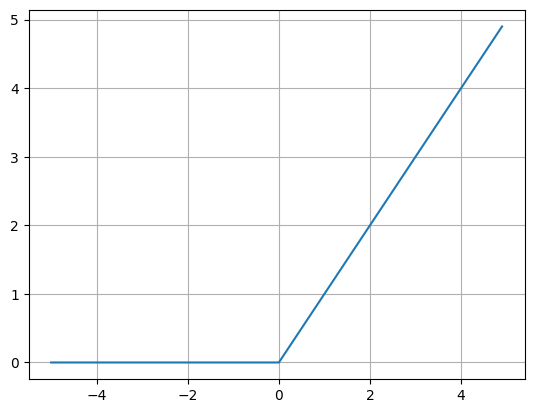

In [27]:
def ReLU(x):
	return np.maximum(0, x) # 0과 매개 변수 x에 입력된 값 중에 큰 값을 반환
													# 인자의 값이 0보다 작을 경우는 항상 0, 0보다 클 경우는 입력된 값이 반환됨
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.grid()
plt.show()

In [40]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)

        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)

        grad[idx] = (fx1 - fx2) / (2 * delta_x)

        x[idx] = tmp_val
        it.iternext()

    return grad

class my_NN01:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.W1 = np.random.rand(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.B1 = np.random.rand(self.hidden_nodes)
        self.W2 = np.random.rand(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.B2 = np.random.rand(self.output_nodes)
        self.learning_rate = learning_rate
        self.input_data = None
        self.target_data = None

    def feed_forward(self):
        delta = 1e-7
        A1 = np.dot(self.input_data, self.W1) + self.B1
        Z1 = Sigmoid(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        y = Sigmoid(A2)
        return -np.sum(self.target_data * np.log(y + delta) + (1 - self.target_data) * np.log((1 - y) + delta))

    def cost(self):
        delta = 1e-7
        A1 = np.dot(self.input_data, self.W1) + self.B1
        Z1 = Sigmoid(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        y = Sigmoid(A2)
        cost_val = -np.sum(self.target_data * np.log(y + delta) + (1 - self.target_data) * np.log((1 - y) + delta))
        return cost_val
    
    def train(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data
        f = lambda x : self.feed_forward()
        self.W1 -= self.learning_rate * numerical_derivative(f, self.W1)
        self.B1 -= self.learning_rate * numerical_derivative(f, self.B1)
        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
        self.B2 -= self.learning_rate * numerical_derivative(f, self.B2)
    
    def predict(self, input_data):
        A1 = np.dot(self.input_data, self.W1) + self.B1
        Z1 = Sigmoid(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        y = Sigmoid(A2)
        
        predicted_num = np.argmax(y)
        return predicted_num

    def accuracy(self, test_data):
        matched_list = [] # 일치할 경우를 기록할 리스트
        not_matched_lst = [] # 불일치할 경우를 기록할 리스트

        for index in range(len(test_data)):
            label = int(test_data[index, 0])
            data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01
            predicted_num = self.predict(np.array(data, ndmin = 2))
            
            if(label == predicted_num):
                matched_list.append(index)
            else:
                not_matched_lst.append(index)

        print('정확도:', 100 * (len(matched_list) / (len(test_data))), ' %')
        return matched_list, not_matched_lst

In [41]:
# 데이터
import pandas as pd
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

# 학습(train) 데이터를 입력 변수와 출력 변수로 나누기
import numpy as np
data_train = np.array(df_train, dtype = np.float32)

# 테스트(test) 데이터를 입력 변수와 출력 변수로 나누기
data_test = np.array(df_test, dtype = np.float32)

In [44]:
# 모델 객체 만들기
my_model = my_NN01(784, 100, 10, 0.01)

# 비용함수 값을 저장할 리스트 생성하기
cost_val_list = []

for step in range(len(data_train)):
	input_data = ((data_train[step, 1:] / 255.0) * 0.99) + 0.01
	target_data = np.zeros(10) + 0.01
	target_data[int(data_train[step, 0])] = 0.99
	my_model.train(input_data, target_data)

	if step % 200 == 0:
		print('단계:', step, ', 비용(손실 값):', my_model.cost())

		cost_val_list.append(my_model.cost()) # 손실함수 값 저장하기

In [43]:
my_model.accuracy(data_test)

정확도: 10.0  %


([2,
  3,
  5,
  22,
  40,
  44,
  48,
  50,
  51,
  69,
  83,
  92,
  93,
  94,
  105,
  108,
  113,
  117,
  138,
  143,
  144,
  164,
  169,
  170,
  174,
  202,
  207,
  218,
  224,
  233,
  239,
  245,
  253,
  261,
  263,
  264,
  268,
  273,
  275,
  281,
  288,
  289,
  290,
  301,
  319,
  321,
  331,
  345,
  362,
  366,
  371,
  373,
  374,
  378,
  387,
  403,
  430,
  435,
  440,
  443,
  465,
  469,
  492,
  502,
  503,
  510,
  514,
  517,
  521,
  525,
  544,
  553,
  554,
  558,
  564,
  587,
  591,
  593,
  595,
  643,
  658,
  696,
  720,
  755,
  756,
  777,
  788,
  795,
  825,
  833,
  848,
  861,
  862,
  864,
  868,
  874,
  887,
  921,
  922,
  926,
  928,
  932,
  939,
  944,
  949,
  955,
  960,
  967,
  979,
  994,
  996,
  1000,
  1001,
  1004,
  1015,
  1028,
  1036,
  1040,
  1049,
  1055,
  1120,
  1128,
  1132,
  1150,
  1163,
  1169,
  1184,
  1188,
  1219,
  1250,
  1287,
  1292,
  1307,
  1309,
  1317,
  1321,
  1334,
  1336,
  1338,
  1343,
  1344,
